In [ ]:
import json, re
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import ToktokTokenizer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from sentiment_analysis_spanish import sentiment_analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Leemos los datos
df1 = pd.read_excel("/content/gdrive/MyDrive/Diplomado ciencia de datos 2022/Proyecto/ED_nlp.xlsx")
df1.head()

,Marca temporal,Edad,Sexo,Estrato socioeconómico al que pertenece,Usted es estudiante de,¿Qué porcentaje de avance lleva de su programa de formación?,Facultad a la cual pertenece,Departamento al que pertenece,Programa académico,¿Ha respondido la encuesta educación en tiempos de COVID-19 en otro curso?,...,¿El docente hace saber de manera oportuna las calificaciones de evaluaciones y demás actividades?,¿El docente muestra actitudes de respeto y de disposición al diálogo con los estudiantes?,¿El docente muestra compromiso e interés por el aprendizaje de los estudiantes?,¿El docente utiliza de forma eficiente el tiempo para llevar a cabo las actividades de la clase?,"Tomando en cuenta que con la pandemia las clases han tenido que dictarse de forma remota, ¿considera usted que el docente ha adaptado de forma correcta la metodología, esto, haciendo uso de dinámicas y ejercicios que facilitan el aprendizaje en virtualidad de su clase?","En el marco de la pandemia y las clases remotas, los recursos TIC (Tecnologías de la Información y las Comunicaciones) han tomado gran relevancia. ¿Cómo considera que el docente ha hecho uso de dichas herramientas para impartir las temáticas y evaluar las mismas?","De los siguientes materiales de apoyo, ¿cuáles han sido utilizados por el docente en este curso? (Señala únicamente los que emplean para esta clase)","De acuerdo con el desempeño, ¿qué aspectos positivos le gustaría destacar del docente?",¿Qué aspectos por mejorar considera pertinentes mencionar del docente?,Importancia del curso
0,2022-01-30 21:46:40.085,21-25,Masculino,2.0,Pregrado,Entre 40% y 70%,Ciencias,Estadística,Estadística,Si,...,Ocasionalmente,Frecuentemente,Frecuentemente,Ocasionalmente,De forma parcial,Aceptable,"Artículos científicos, Libro de texto, Video, ...","Comunicación, sencillez, disponibilidad, amabi...",Puntualidad,Importante
1,2022-01-30 22:06:32.095,21-25,Masculino,3.0,Pregrado,Entre 40% y 70%,Ciencias,Estadística,Estadística,No,...,Frecuentemente,Siempre,Ocasionalmente,Frecuentemente,De forma parcial,Aceptable,"Artículos científicos, Libro de texto, Materia...","Puntualidad, disposicion, amabilidad, Conocimi...",Disminuir la velocidad a la que desarrolla los...,Muy importante
2,2022-01-31 07:18:08.770,31-35,Femenino,3.0,Pregrado,Mas del 70%,Ingeniería,Ingeniería de Sistemas e Industrial,Ingenieria industrial,No,...,Siempre,Siempre,Siempre,Siempre,"Sí, totalmente",Muy alto,"Artículos científicos, Libro de texto, Diagram...",Ninguno,Ninguno,Importante
3,2022-01-31 07:20:25.612,15-20,Femenino,3.0,Pregrado,Menos del 40%,Ciencias,Estadística,NaN,No,...,Frecuentemente,Siempre,Siempre,Siempre,"Sí, totalmente",Alto,"Video, Audiovisual o multimedia, Paquete de có...","Disposición a la hora de dictar la clase, buen...",Organización del tablero de la sesión de clase,Importante
4,2022-01-31 07:21:51.154,15-20,Femenino,2.0,Pregrado,Menos del 40%,Ciencias Agrarias,Ingeniería agronómica,Ingeniería Agronómica,No,...,Siempre,Siempre,Siempre,Siempre,"Sí, totalmente",Muy alto,Recursos y materiales informáticos,El profesor se preocupa porque uno aprenda rea...,No lo sé,Muy importante


In [ ]:
# Cambiamos el nombre a las columnas
df1.rename(columns = {"De acuerdo con el desempeño, ¿qué aspectos positivos le gustaría destacar del docente?":"destacar"
                     ,"¿Qué aspectos por mejorar considera pertinentes mencionar del docente?":"mejorar",
                     },
          inplace = True)

In [ ]:
# Veamos cuántos textos (reseñas) hay por profesor:
total = df1.groupby(['Nombre del profesor '])['mejorar'].count().sum()
df1.columns

df1.groupby(['Nombre del profesor '])['mejorar'].count().sort_values(ascending = False)/total*100
# Hallar frecuencias relativas.  (Check). Ahora sólo falta anonimizar el nombre de los profesores

In [ ]:
# Cogemos solo las variables que usaremos para el procesamiento de lenguaje natural
df = df1.iloc[:,79:81] # columnas 80 y 81
df = pd.DataFrame(df)

In [ ]:
df.head()

,destacar,mejorar
0,"Comunicación, sencillez, disponibilidad, amabi...",Puntualidad
1,"Puntualidad, disposicion, amabilidad, Conocimi...",Disminuir la velocidad a la que desarrolla los...
2,Ninguno,Ninguno
3,"Disposición a la hora de dictar la clase, buen...",Organización del tablero de la sesión de clase
4,El profesor se preocupa porque uno aprenda rea...,No lo sé


In [ ]:
import string
tabla = str.maketrans('', '', string.digits)

In [ ]:
def limpiar_texto(texto):
    """
    Función para realizar la limpieza de un texto dado.
    """
    # Eliminamos los caracteres especiales
    texto = re.sub(r'\W', ' ', str(texto)) # Sólo pondré en
    # Eliminado las palabras que tengo un solo caracter
    texto = texto.translate(tabla)  # quito  números... 
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    # Sustituir los espacios en blanco en uno solo
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)
    # Convertimos textos a minusculas
    texto = texto.lower()
    return texto
# Voy a dejar el texto en bruto...

In [ ]:
df["mejorar"][54].lower()

'la pedagogía principalmente, la forma de enseñar suele ser muy catedrático y monótono, con pocos ejercicios prácticos solo los realiza para evaluar y no para practicar, la retroalimentación no es buena se le preguntan cosas sobre los procedimientos y no explica solo da la respuesta del ejercicio. mayor compromiso con las clases ya que duramos casi dos semanas sin clases porque tenía problemas de conexión pero no envió vídeos, ejercicios, audios o algo para no atrasarnos. poca disposición de dialogo, se logró a última hora ajustar porcentajes porque ya no había tiempo pero fue porque el curso se lo solicitó varias veces, cuando se le hacían propuestas como grupo no se atendían y ni se respondían. tampoco respeta tiempos del curso, se a demorado en enviar notas y además cuando ha tenido problemas de conexión no avisa con tiempo, hemos durado hasta una hora conectados esperando al profesor sin ninguna razón, para mi eso es irrespetar el tiempo de nuestro tiempo también '

In [ ]:
type(df["mejorar"][3])

str

In [ ]:
limpiar_texto(df["mejorar"][1])

'disminuir la velocidad la que desarrolla los temas'

In [ ]:
df["mejorar"] = df["mejorar"].astype("str")
df["destacar"] = df["destacar"].astype("str")
df["mejorar"] = df.loc[:,"mejorar"].apply(limpiar_texto)
df["destacar"] = df.loc[:,"destacar"].apply(limpiar_texto)

In [ ]:
!pip install stanza

In [ ]:
import stanza
stanza.download('es', package='ancora', processors='tokenize,mwt,pos,lemma', verbose=True)

INFO:stanza:Downloading these customized packages for language: es (Spanish)...
| Processor       | Package  |
------------------------------
| tokenize        | ancora   |
| mwt             | ancora   |
| pos             | ancora   |
| lemma           | ancora   |
| pretrain        | ancora   |
| backward_charlm | newswiki |
| forward_charlm  | newswiki |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [ ]:
#stNLP = stanza.Pipeline(processors='tokenize,mwt,pos,lemma', lang='es', use_gpu=True)

In [ ]:
type(df["mejorar"][1])

str

In [ ]:
import simplemma

In [ ]:
df["mejorar"][12]

'no considero que deba cambiar pues el es un docente flexible que permite que se hagan acuerdos en el trascurso del curso'

In [ ]:
lematizando = []
for i in range(len(df["mejorar"])):
  lematizando.append(simplemma.text_lemmatizer(df["mejorar"][i], lang='es'))

In [ ]:
df["lema"] = lematizando

In [ ]:
df.head()

,destacar,mejorar,lema
0,comunicación sencillez disponibilidad amabilidad,puntualidad,[puntualidad]
1,puntualidad disposicion amabilidad conocimient...,disminuir la velocidad la que desarrolla los t...,"[disminuir, el, velocidad, el, que, desarrolla..."
2,ninguno,ninguno,[ninguno]
3,disposición la hora de dictar la clase buena e...,organización del tablero de la sesión de clase,"[organización, del, tablero, de, el, sesión, d..."
4,el profesor se preocupa porque uno aprenda rea...,no lo sé,"[no, él, ser]"


## Análisis de sentimientos

Intenté usar Vader, pero no es tan bueno para el español. Voy a usar Robertuito.

In [ ]:
pip install pysentimiento

In [ ]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df.dropna(inplace = True)

In [ ]:
prueba = analyzer.predict(df["mejorar"][20]) 
# Sí trabaja de manera vectorial!!!

In [ ]:
df["mejorar"]

0                                             puntualidad
1       disminuir la velocidad la que desarrolla los t...
2                                                 ninguno
3          organización del tablero de la sesión de clase
4                                               no lo sé 
                              ...                        
1350             compartir las notas con los estudiantes 
1351              el orden de sus explicaciones en paint 
1352                                             ninguno 
1353                                                  nan
1354           orden en los escritos del tablero virtual 
Name: mejorar, Length: 1355, dtype: object

In [ ]:
prueba.output

'NEU'

In [ ]:
help(create_analyzer)

In [ ]:
# Veamos unos cuantos ejemplos para la seección de "cosas por mejorar"
#df['punt_mejorar'] = df.iloc[:,1].apply(lambda x: analyzer.predict(x))
df["punt_mejorar"] = analyzer.predict(df["mejorar"])
# Averiguar si analyzer trabaja directo de manera vectorial. (SÍ)
# Mirar si se puede usar batch size. (no la he pillado) 
# No quitar comas ni puntos. (No pude...) (YA...)

  0%|          | 0/42 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 1335
  Batch size = 32


In [ ]:
prueba

[AnalyzerOutput(output=NEU, probas={NEU: 0.934, POS: 0.043, NEG: 0.023}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.989, POS: 0.006, NEG: 0.005}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.595, NEG: 0.207, POS: 0.197}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.987, NEG: 0.009, POS: 0.004}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.960, NEG: 0.026, POS: 0.014}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.983, POS: 0.015, NEG: 0.002}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.965, POS: 0.022, NEG: 0.012}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.990, NEG: 0.008, POS: 0.002}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.974, NEG: 0.023, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.729, NEU: 0.269, POS: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.996, NEU: 0.004, NEG: 0.001}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.985, POS: 0.012, NEG: 0.003}),
 AnalyzerOutput(output=NEU, probas={NEU: 0.991, NEG: 0.005, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NE

Hagamos un par de pruebas...

In [ ]:
print("reseña:",df["mejorar"][500])
print(df['punt_mejorar'][500]) # sin puntuaciones daba negativo: 0.985. NEU = 0.014

reseña: su manera de expresarse hacia los estudiantes a pesar que intenta ser comprensivo su manera de resolver preguntas es un poco fuerte llegando a ser un poco tosco y cortante 
AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.014, POS: 0.000})


In [ ]:
print("reseña:",df["mejorar"][200])
print(df['punt_mejorar'][200])

reseña: ninguno
AnalyzerOutput(output=NEU, probas={NEU: 0.595, NEG: 0.207, POS: 0.197})


In [ ]:
print("reseña:",df["mejorar"][10])
print(df['punt_mejorar'][10])

reseña: nada considero que es un excelente profesor 
AnalyzerOutput(output=POS, probas={POS: 0.996, NEU: 0.004, NEG: 0.001})


## Ahora, hagamos un pequeño análisis de tópicos

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df["Tokens"] = df["lema"]

In [ ]:
tokenizer = ToktokTokenizer() 
df["Tokens"] = df.Tokens.apply(tokenizer.tokenize) # No hace falta, ya tokenicé cuando lematicé
df.head()

,destacar,mejorar,lema,Tokens
0,comunicación sencillez disponibilidad amabilidad,puntualidad,[puntualidad],"[[, ', puntualidad, ', ]]"
1,puntualidad disposicion amabilidad conocimient...,disminuir la velocidad la que desarrolla los t...,"[disminuir, el, velocidad, el, que, desarrolla...","[[, ', disminuir, ', ,, ', el, ', ,, ', veloci..."
2,ninguno,ninguno,[ninguno],"[[, ', ninguno, ', ]]"
3,disposición la hora de dictar la clase buena e...,organización del tablero de la sesión de clase,"[organización, del, tablero, de, el, sesión, d...","[[, ', organización, ', ,, ', del, ', ,, ', ta..."
4,el profesor se preocupa porque uno aprenda rea...,no lo sé,"[no, él, ser]","[[, ', no, ', ,, ', él, ', ,, ', ser, ', ]]"


In [ ]:
STOPWORDS = set(stopwords.words("spanish"))

def filtrar_stopword_digitos(tokens):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    return [token for token in tokens if token not in STOPWORDS 
            and not token.isdigit()]

df["Tokenslema"] = df.lema.apply(filtrar_stopword_digitos)
#df["Tokens"] = df.Tokens.apply(filtrar_stopword_digitos)
df.head()

,destacar,mejorar,lema,Tokens,Tokenslema
0,comunicación sencillez disponibilidad amabilidad,puntualidad,[puntualidad],"[[, ', puntualidad, ', ]]",[puntualidad]
1,puntualidad disposicion amabilidad conocimient...,disminuir la velocidad la que desarrolla los t...,"[disminuir, el, velocidad, el, que, desarrolla...","[[, ', disminuir, ', ,, ', ', ,, ', velocidad,...","[disminuir, velocidad, desarrollar, tema]"
2,ninguno,ninguno,[ninguno],"[[, ', ninguno, ', ]]",[ninguno]
3,disposición la hora de dictar la clase buena e...,organización del tablero de la sesión de clase,"[organización, del, tablero, de, el, sesión, d...","[[, ', organización, ', ,, ', ', ,, ', tablero...","[organización, tablero, sesión, clase]"
4,el profesor se preocupa porque uno aprenda rea...,no lo sé,"[no, él, ser]","[[, ', ', ,, ', ', ,, ', ser, ', ]]",[ser]


In [ ]:
# stemmer = SnowballStemmer("spanish")

# def stem_palabras(tokens):
#     """
#     Reduce cada palabra de una lista dada a su raíz.
#     """
#     return [stemmer.stem(token) for token in tokens]

# df["Tokens"] = df.Tokens.apply(stem_palabras)

# df.head()


## No usar stem. Lematización sí.

,destacar,mejorar,Tokens
0,comunicación sencillez disponibilidad amabilidad,puntualidad,[puntual]
1,puntualidad disposicion amabilidad conocimient...,disminuir la velocidad la que desarrolla los t...,"[disminu, veloc, desarroll, tem]"
2,ninguno,ninguno,[ningun]
3,disposición la hora de dictar la clase buena e...,organización del tablero de la sesión de clase,"[organiz, tabler, sesion, clas]"
4,el profesor se preocupa porque uno aprenda rea...,no lo sé,[se]


In [ ]:
pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.2 MB 1.9 MB/s 


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
diccionario = Dictionary(df.Tokenslema)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 1399


In [ ]:
diccionario.filter_extremes(no_below=3, no_above = 1)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 488


In [ ]:
# Creamos el corpus 
corpus = [diccionario.doc2bow(noticia) for noticia in df.Tokenslema]

# Mostramos el BOW de una noticia
print(corpus[6])

[(16, 1), (17, 1)]


In [ ]:
# Indice de perplejidad: Me dará un índice por cada LDA.
# índices de cohehrencia.

In [ ]:
lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=20, random_state=42, 
               chunksize=1000, passes=20, alpha='auto')

In [ ]:
topicos = lda.print_topics(num_words=4, num_topics=5)
for topico in topicos:
    print(topico)
# mirar palabras vacías del ocntexto

(3, '0.123*"taller" + 0.078*"rápido" + 0.074*"mas" + 0.074*"materia"')
(2, '0.133*"puntualidad" + 0.046*"horario" + 0.046*"actividad" + 0.042*"caso"')
(8, '0.268*"nota" + 0.115*"entrega" + 0.109*"tiempo" + 0.079*"entregar"')
(13, '0.171*"clase" + 0.133*"ejercicio" + 0.101*"hacer" + 0.100*"mas"')
(5, '0.778*"ninguno" + 0.027*"presentar" + 0.022*"momento" + 0.022*"ocurrir"')


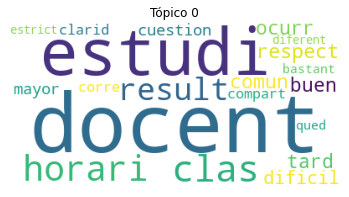

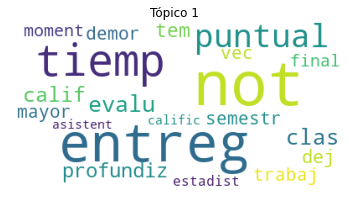

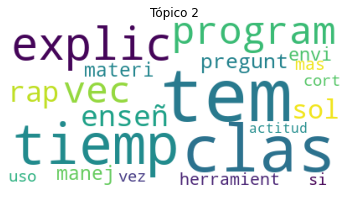

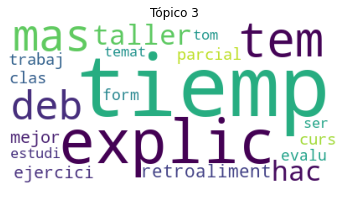

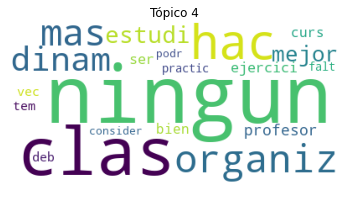

In [ ]:
for i in range(0, 5):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', prefer_horizontal=1.0, font_step=2 )
               .fit_words(dict(lda.show_topic(i, 20))))
    plt.axis("off")
    plt.title("Tópico " + str(i))
    plt.show()

## hacerlo con tf-idf en vez de hacerlo con bolsas de palabras.
# eso se va a ver en qué tanto se repite en cada texto una palabra
# y qué tanto se repite en todo el texto (visión global)

## mirar bigramas, trigramas.

# en sklearn existe eso.

In [ ]:
indice_reseña = 54 # número arbitrario
reseña = df["Tokens"][indice_reseña]
print("Reseña:",reseña)


Reseña: ['pedagog', 'principal', 'form', 'enseñ', 'suel', 'ser', 'catedrat', 'monoton', 'poc', 'ejercici', 'practic', 'sol', 'realiz', 'evalu', 'practic', 'retroaliment', 'buen', 'pregunt', 'cos', 'proced', 'explic', 'sol', 'da', 'respuest', 'ejercici', 'mayor', 'compromis', 'clas', 'dur', 'casi', 'dos', 'seman', 'clas', 'problem', 'conexion', 'envi', 'vide', 'ejercici', 'audi', 'atras', 'poc', 'disposicion', 'dialog', 'logr', 'ultim', 'hor', 'ajust', 'porcentaj', 'tiemp', 'curs', 'solicit', 'vari', 'vec', 'hac', 'propuest', 'grup', 'atend', 'respond', 'tampoc', 'respet', 'tiemp', 'curs', 'demor', 'envi', 'not', 'ademas', 'problem', 'conexion', 'avis', 'tiemp', 'dur', 'hor', 'conect', 'esper', 'profesor', 'ningun', 'razon', 'irrespet', 'tiemp', 'tiemp']


In [ ]:
df.iloc[54,1]

'la pedagogía principalmente la forma de enseñar suele ser muy catedrático y monótono con pocos ejercicios prácticos solo los realiza para evaluar y no para practicar la retroalimentación no es buena se le preguntan cosas sobre los procedimientos y no explica solo da la respuesta del ejercicio mayor compromiso con las clases ya que duramos casi dos semanas sin clases porque tenía problemas de conexión pero no envió vídeos ejercicios audios o algo para no atrasarnos poca disposición de dialogo se logró a última hora ajustar porcentajes porque ya no había tiempo pero fue porque el curso se lo solicitó varias veces cuando se le hacían propuestas como grupo no se atendían y ni se respondían tampoco respeta tiempos del curso se a demorado en enviar notas y además cuando ha tenido problemas de conexión no avisa con tiempo hemos durado hasta una hora conectados esperando al profesor sin ninguna razón para mi eso es irrespetar el tiempo de nuestro tiempo también '

In [ ]:
bow_reseña = corpus[indice_reseña]
distribucion_reseña = lda[bow_reseña]

In [ ]:
# Indices de los topicos mas significativos
dist_indices = [topico[0] for topico in lda[bow_reseña]]
# Contribución de los topicos mas significativos
dist_contrib = [topico[1] for topico in lda[bow_reseña]]

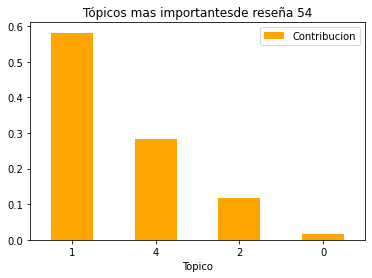

In [ ]:
distribucion_topicos = pd.DataFrame({'Topico':dist_indices,
                                     'Contribucion':dist_contrib })
distribucion_topicos.sort_values('Contribucion', 
                                 ascending=False, inplace=True)
ax = distribucion_topicos.plot.bar(y='Contribucion',x='Topico', 
                                   rot=0, color="orange",
                                   title = 'Tópicos mas importantes'
                                   'de reseña ' + str(indice_reseña))

In [ ]:
for ind, topico in distribucion_topicos.iterrows():
    print("*** Tópico: " + str(int(topico.Topico)) + " ***")
    palabras = [palabra[0] for palabra in lda.show_topic(
        topicid=int(topico.Topico))]
    palabras = ', '.join(palabras)
    print(palabras, "\n")

*** Tópico: 1 ***
clas, estudi, profesor, hac, deb, tiemp, evalu, falt, trabaj, form 

*** Tópico: 4 ***
tem, vec, clas, mejor, explic, curs, tiemp, estudi, pued, ten 

*** Tópico: 2 ***
clas, mas, ejercici, hac, dinam, practic, tem, particip, sol, r 

*** Tópico: 0 ***
ningun, bien, explic, moment, profesor, buen, consider, teoric, excel, olvid 



In [ ]:
# lematizador está en spacy


## Creación de tópicos con transformers

In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 5.2 MB 38.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 62.4 MB/s 
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 27.9 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340658 sha256=4479bfe76bc18aa044a2cd09664f11a91798b863f03c18a3e2687fffe839dcc8
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from bertopic import BERTopic

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["Tokens"] = df["mejorar"]

In [ ]:
tokenizer = ToktokTokenizer() 
df["Tokens"] = df.Tokens.apply(tokenizer.tokenize)
df.head()

,destacar,mejorar,punt_mejorar,Tokens
0,comunicación sencillez disponibilidad amabilidad,puntualidad,"AnalyzerOutput(output=NEU, probas={NEU: 0.934,...",[puntualidad]
1,puntualidad disposicion amabilidad conocimient...,disminuir la velocidad a la que desarrolla los...,"AnalyzerOutput(output=NEU, probas={NEU: 0.990,...","[disminuir, la, velocidad, a, la, que, desarro..."
2,ninguno,ninguno,"AnalyzerOutput(output=NEU, probas={NEU: 0.595,...",[ninguno]
3,disposición a la hora de dictar la clase buena...,organización del tablero de la sesión de clase,"AnalyzerOutput(output=NEU, probas={NEU: 0.987,...","[organización, del, tablero, de, la, sesión, d..."
4,el profesor se preocupa porque uno aprenda rea...,no lo sé,"AnalyzerOutput(output=NEU, probas={NEU: 0.960,...","[no, lo, sé]"


In [ ]:
# Creo el modelo
model = BERTopic(language="spanish")

# A última hora: ClUSTER DE MENSAJES

In [ ]:
pip install sentence_transformers

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('sentence-transformers/paraphrase-distilroberta-base-v1')

In [ ]:
embeddings = model.encode(df["destacar"])

In [ ]:
embeddings.shape # 1355 textos, 768 vectores de representación.

(1355, 768)

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
# Reduzcamos a 80, porque los textos suelen ser cortos.
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100, whiten = True,random_state = 123)

In [ ]:
reducepca = pca.fit_transform(embeddings)
print("La varianza explicada es del",pca.explained_variance_ratio_.sum()*100,"%") # random_seed. Tenerlo presente

La varianza explicada es del 89.69008922576904 %


In [ ]:
# Fit and transform the data
reducer = umap.UMAP(n_components = 100)
X_trans = reducer.fit_transform(embeddings) 

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700867 sha256=f063d9e2c3fae5ebdf43a46f930e089b24fd12c0e50f8c0ab87fe11b6c215401
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusters = hdbscan.HDBSCAN(min_cluster_size = 10,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(X_trans)

In [ ]:
dflabels = pd.DataFrame(clusters.labels_)

In [ ]:
dflabels.value_counts()

 3    1258
 2      24
 0      20
 4      20
 1      17
-1      16
dtype: int64

In [ ]:
df["etiqueta"] = dflabels

In [ ]:
atipicos = df["etiqueta"][df["etiqueta"]== -1].index

In [ ]:
df.iloc[atipicos,:]

,destacar,mejorar,etiqueta
2,ninguno,ninguno,-1
54,ninguna,la pedagogía principalmente la forma de enseña...,-1
74,todos,ninguno,-1
259,ninguno,ninguno,-1
435,ninguno buen profesor,ninguno buen profesor,-1
510,ninguno,casi todo el trato hacia sus estudiantes es mu...,-1
619,todo,nada,-1
835,todo,creo que dejar un tris menos de trabajo,-1
840,todo,nada,-1
883,todo,ninguno,-1


In [ ]:
def generate_clusters(message_embeddings,
                      n_neighbors,
                      n_components, 
                      min_cluster_size,
                      random_state = None):
    """
    Generate HDBSCAN cluster object after reducing embedding dimensionality with UMAP
    """
    
    umap_embeddings = (umap.UMAP(n_neighbors=n_neighbors, 
                                n_components=n_components, 
                                metric='cosine', 
                                random_state=random_state)
                            .fit_transform(message_embeddings))

    clusters = hdbscan.HDBSCAN(min_cluster_size = min_cluster_size,
                               metric='euclidean', 
                               cluster_selection_method='eom').fit(umap_embeddings)

    return clusters

In [ ]:

def score_clusters(clusters, prob_threshold = 0.05):
    """
    Returns the label count and cost of a given cluster supplied from running hdbscan
    """
    
    cluster_labels = clusters.labels_
    label_count = len(np.unique(cluster_labels))
    total_num = len(clusters.labels_)
    cost = (np.count_nonzero(clusters.probabilities_ < prob_threshold)/total_num)
    
    return label_count, cost

In [ ]:
def random_search(embeddings, space, num_evals):
    """
    Randomly search hyperparameter space and limited number of times 
    and return a summary of the results
    """
    
    results = []
    
    for i in trange(num_evals):
        n_neighbors = random.choice(space['n_neighbors'])
        n_components = random.choice(space['n_components'])
        min_cluster_size = random.choice(space['min_cluster_size'])
        
        clusters = generate_clusters(embeddings, 
                                     n_neighbors = n_neighbors, 
                                     n_components = n_components, 
                                     min_cluster_size = min_cluster_size, 
                                     random_state = 42)
    
        label_count, cost = score_clusters(clusters, prob_threshold = 0.05)
                
        results.append([i, n_neighbors, n_components, min_cluster_size, 
                        label_count, cost])
    
    result_df = pd.DataFrame(results, columns=['run_id', 'n_neighbors', 'n_components', 
                                               'min_cluster_size', 'label_count', 'cost'])
    
    return result_df.sort_values(by='cost')